## Tugas Kecerdasan Buatan - Example 01
NIM             : 247056008
<br>Nama            : Muhammad Ali Syahputra
<br>Program Studi   : Data Science dan Artificial Intelligence
<br>Mata Kuliah     : Kecerdasan Buatan

### Import Library

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data Input (X):
[[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]

Target Output (y):
[ 1 -1 -1 -1]


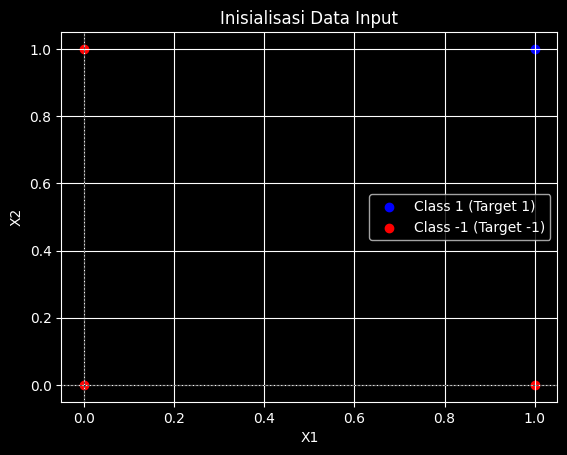

In [42]:
# === Step 0: Inisialisasi Data Input ===
# Data input (X1, X2, Bias) dan target (y)
X = np.array([
    [1, 1, 1],  # Baris 1: X1, X2, Bias
    [1, 0, 1],  # Baris 2: X1, X2, Bias
    [0, 1, 1],  # Baris 3: X1, X2, Bias
    [0, 0, 1]   # Baris 4: X1, X2, Bias
])

y = np.array([1, -1, -1, -1])  # Target output dari tabel

# Tampilkan data input dan target
print("Data Input (X):")
print(X)
print("\nTarget Output (y):")
print(y)

# === Step 1: Plot Data ===
# plt.figure(figsize=(8, 6), facecolor='white')

# Pisahkan data berdasarkan kelas untuk visualisasi
for i in range(len(X)):
    if y[i] == 1:  # Class 1 (Target 1)
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Class 1 (Target 1)' if i == 0 else "")
    else:  # Class -1 (Target -1)
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Class -1 (Target -1)' if i == 1 else "")

# Tambahkan label dan elemen visualisasi
plt.title('Inisialisasi Data Input')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Garis horizontal
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Garis vertikal
plt.grid(True)
plt.legend()
plt.show()

In [43]:
# Step 2: Inisialisasi bobot (w1, w2, w3) dan learning rate
weights = np.array([0.0, 0.0, 0.0])  # Bobot awal: w1, w2, b (bias)
learning_rate = 0.1  # Learning rate

# Fungsi aktivasi
def activation(weighted_sum):
    """
    Fungsi aktivasi menggunakan step function.
    Output adalah 1 jika weighted_sum >= 0, dan -1 jika < 0.
    """
    return 1 if weighted_sum >= 0 else -1

# Fungsi pelatihan Perceptron
def train_perceptron(X, y, weights, learning_rate):
    """
    Melatih model Perceptron untuk mendapatkan bobot optimal (w1, w2, w3).
    """
    epoch = 0  # Untuk melacak jumlah iterasi
    while True:
        print(f"\nEpoch {epoch}")
        weight_updates = False  # Melacak apakah ada pembaruan bobot
        for i in range(len(X)):
            # Hitung weighted sum
            weighted_sum = np.dot(X[i], weights)
            # Hitung output berdasarkan fungsi aktivasi
            output = activation(weighted_sum)
            print(f"Input: {X[i]}, Weighted Sum: {weighted_sum:.2f}, Output: {output}, Target: {y[i]}")
            # Perbarui bobot jika output tidak sesuai dengan target
            if output != y[i]:
                error = y[i] - output
                weights += learning_rate * error * X[i]
                weight_updates = True  # Tandai bahwa bobot diperbarui
                print(f"Updated weights: {weights}")
            else:
                print(f"No update for input {i + 1}")
        epoch += 1
        # Hentikan iterasi jika tidak ada lagi pembaruan bobot
        if not weight_updates:
            break
    return weights

# Step 3: Latih Model
final_weights = train_perceptron(X, y, weights, learning_rate)

# Cetak hasil akhir bobot
print("\n=== Final Weights ===")
print(f"w1: {final_weights[0]}, w2: {final_weights[1]}, b (bias): {final_weights[2]}")



Epoch 0
Input: [1 1 1], Weighted Sum: 0.00, Output: 1, Target: 1
No update for input 1
Input: [1 0 1], Weighted Sum: 0.00, Output: 1, Target: -1
Updated weights: [-0.2  0.  -0.2]
Input: [0 1 1], Weighted Sum: -0.20, Output: -1, Target: -1
No update for input 3
Input: [0 0 1], Weighted Sum: -0.20, Output: -1, Target: -1
No update for input 4

Epoch 1
Input: [1 1 1], Weighted Sum: -0.40, Output: -1, Target: 1
Updated weights: [0.  0.2 0. ]
Input: [1 0 1], Weighted Sum: 0.00, Output: 1, Target: -1
Updated weights: [-0.2  0.2 -0.2]
Input: [0 1 1], Weighted Sum: 0.00, Output: 1, Target: -1
Updated weights: [-0.2  0.  -0.4]
Input: [0 0 1], Weighted Sum: -0.40, Output: -1, Target: -1
No update for input 4

Epoch 2
Input: [1 1 1], Weighted Sum: -0.60, Output: -1, Target: 1
Updated weights: [ 0.   0.2 -0.2]
Input: [1 0 1], Weighted Sum: -0.20, Output: -1, Target: -1
No update for input 2
Input: [0 1 1], Weighted Sum: 0.00, Output: 1, Target: -1
Updated weights: [ 0.   0.  -0.4]
Input: [0 0 1],

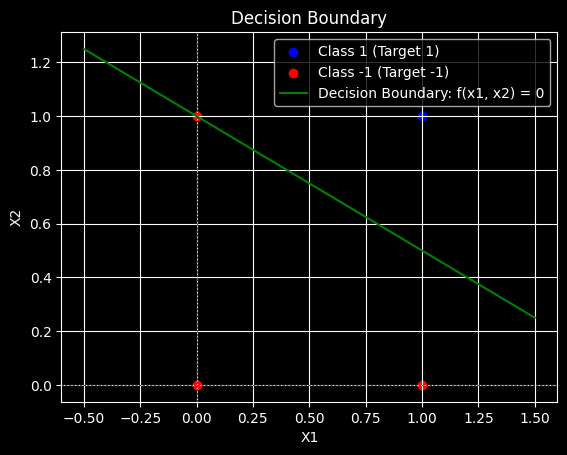

In [44]:
# Step 4: Tentukan Decision Boundary
def decision_boundary(x1, weights):
    """
    Menghitung nilai x2 berdasarkan persamaan decision boundary: f(x1, x2) = 0
    Persamaan: w1 * x1 + w2 * x2 + b = 0
    """
    w1, w2, b = weights
    return -(w1 * x1 + b) / w2

# Step 5: Visualisasi Decision Boundary
x1_range = np.linspace(-0.5, 1.5, 100)  # Rentang nilai x1
x2_range = decision_boundary(x1_range, final_weights)  # Hitung x2 untuk decision boundary

# Plot decision boundary di atas data yang sudah divisualisasikan sebelumnya
# plt.figure(figsize=(8, 6), facecolor='white')
for i in range(len(X)):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Class 1 (Target 1)' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Class -1 (Target -1)' if i == 1 else "")

# Tambahkan garis decision boundary
plt.plot(x1_range, x2_range, color='green', label='Decision Boundary: f(x1, x2) = 0')

# Tambahkan label dan elemen visualisasi
plt.title('Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Garis horizontal
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Garis vertikal
plt.grid(True)
plt.legend()
plt.show()



=== Pelatihan dengan Threshold 0.8 ===

Epoch 0
Input: [1 1 1], Weighted Sum: 0.20, Output: -1, Target: 1
Updated weights: [ 0.4  0.6 -0.2]
Input: [1 0 1], Weighted Sum: 0.20, Output: -1, Target: -1
No update for input 2
Input: [0 1 1], Weighted Sum: 0.40, Output: -1, Target: -1
No update for input 3
Input: [0 0 1], Weighted Sum: -0.20, Output: -1, Target: -1
No update for input 4

Epoch 1
Input: [1 1 1], Weighted Sum: 0.80, Output: -1, Target: 1
Updated weights: [ 6.00000000e-01  8.00000000e-01 -5.55111512e-17]
Input: [1 0 1], Weighted Sum: 0.60, Output: -1, Target: -1
No update for input 2
Input: [0 1 1], Weighted Sum: 0.80, Output: 1, Target: -1
Updated weights: [ 0.6  0.6 -0.2]
Input: [0 0 1], Weighted Sum: -0.20, Output: -1, Target: -1
No update for input 4

Epoch 2
Input: [1 1 1], Weighted Sum: 1.00, Output: 1, Target: 1
No update for input 1
Input: [1 0 1], Weighted Sum: 0.40, Output: -1, Target: -1
No update for input 2
Input: [0 1 1], Weighted Sum: 0.40, Output: -1, Target: -

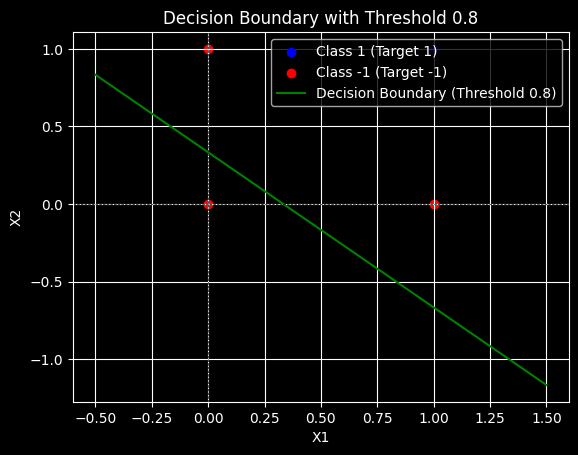

In [45]:
# Step 6: Modifikasi Fungsi Aktivasi untuk Threshold 0.8
def activation_with_threshold(weighted_sum):
    """
    Fungsi aktivasi dengan threshold.
    Output adalah 1 jika weighted_sum >= threshold, dan -1 jika < threshold.
    """
    threshold = 0.8  # Tetapkan threshold
    return 1 if weighted_sum >= threshold else -1

# Fungsi Pelatihan Perceptron dengan Threshold (Gunakan Kembali Bobot)
def train_perceptron_with_threshold(X, y, weights, learning_rate):
    """
    Pelatihan Perceptron dengan threshold 0.8.
    """
    epoch = 0
    while True:
        print(f"\nEpoch {epoch}")
        weight_updates = False
        for i in range(len(X)):
            # Hitung weighted sum
            weighted_sum = np.dot(X[i], weights)
            # Gunakan fungsi aktivasi dengan threshold
            output = activation_with_threshold(weighted_sum)
            print(f"Input: {X[i]}, Weighted Sum: {weighted_sum:.2f}, Output: {output}, Target: {y[i]}")
            # Perbarui bobot jika output tidak sesuai dengan target
            if output != y[i]:
                error = y[i] - output
                weights += learning_rate * error * X[i]
                weight_updates = True
                print(f"Updated weights: {weights}")
            else:
                print(f"No update for input {i + 1}")
        epoch += 1
        # Hentikan jika tidak ada pembaruan bobot
        if not weight_updates:
            break
    return weights

# Step 7: Pelatihan Ulang dengan Threshold
print("\n=== Pelatihan dengan Threshold 0.8 ===")
final_weights_with_threshold = train_perceptron_with_threshold(X, y, final_weights, learning_rate)

# Cetak hasil akhir
print("\n=== Final Weights with Threshold ===")
print(f"w1: {final_weights_with_threshold[0]}, w2: {final_weights_with_threshold[1]}, b: {final_weights_with_threshold[2]}")

# Visualisasi Decision Boundary untuk Threshold 0.8
x1_range = np.linspace(-0.5, 1.5, 100)
x2_range = decision_boundary(x1_range, final_weights_with_threshold)

# plt.figure(figsize=(8, 6), facecolor='white')
for i in range(len(X)):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Class 1 (Target 1)' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Class -1 (Target -1)' if i == 1 else "")

plt.plot(x1_range, x2_range, color='green', label='Decision Boundary (Threshold 0.8)')
plt.title('Decision Boundary with Threshold 0.8')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()
plt.show()


In [46]:
# Step 8: Simulasi Proses untuk Membuat Tabel Hasil
def perceptron_simulation(X, y, weights, learning_rate):
    """
    Simulasikan setiap langkah proses Perceptron untuk menghasilkan tabel hasil.
    """
    # Buat struktur tabel
    results = []
    for i in range(len(X)):
        # Hitung weighted sum
        weighted_sum = np.dot(X[i], weights)
        # Hitung output dengan fungsi aktivasi threshold
        output = activation_with_threshold(weighted_sum)
        # Tentukan apakah ada pembaruan bobot
        if output != y[i]:
            error = y[i] - output
            action = "Decrease" if error < 0 else "Increase"
            weights += learning_rate * error * X[i]
        else:
            action = "None"
        # Simpan hasil ke dalam tabel
        results.append({
            "Inputs": f"{X[i]}",
            "Weight": f"{weights}",
            "Weighted Sum": round(weighted_sum, 2),
            "Output Produced": output,
            "Output Target": y[i],
            "Action": action
        })
    return results

# Jalankan simulasi
simulation_results = perceptron_simulation(X, y, final_weights_with_threshold, learning_rate)

# Konversi hasil ke dalam DataFrame untuk ditampilkan sebagai tabel
df_results = pd.DataFrame(simulation_results)

# Tampilkan hasil tabel
print(df_results)


    Inputs            Weight  Weighted Sum  Output Produced  Output Target  \
0  [1 1 1]  [ 0.6  0.6 -0.2]           1.0                1              1   
1  [1 0 1]  [ 0.6  0.6 -0.2]           0.4               -1             -1   
2  [0 1 1]  [ 0.6  0.6 -0.2]           0.4               -1             -1   
3  [0 0 1]  [ 0.6  0.6 -0.2]          -0.2               -1             -1   

  Action  
0   None  
1   None  
2   None  
3   None  
